In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-white')

# Aspiration: between patient JSD

In [2]:
# Read in data
fnjsdlong = '~/github/aspiration-analysis/data/analysis/jsd.txt'
jsdlong = pd.read_csv(fnjsdlong, sep='\t')

/Users/claire/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## Clean up the data

# Remove "final" throat and stool samples
jsdlong = jsdlong[~jsdlong['sample1'].str.endswith('F')]
jsdlong = jsdlong[~jsdlong['sample2'].str.endswith('F')]
jsdlong = jsdlong[~jsdlong['sample1'].str.endswith('sick')]
jsdlong = jsdlong[~jsdlong['sample2'].str.endswith('sick')]
jsdlong = jsdlong[~jsdlong['sample1'].str.endswith('F2')]
jsdlong = jsdlong[~jsdlong['sample2'].str.endswith('F2')]
jsdlong = jsdlong[~jsdlong['sample1'].str.endswith('F2T')]
jsdlong = jsdlong[~jsdlong['sample2'].str.endswith('F2T')]

# Remove lung transplant samples
jsdlong = jsdlong[~jsdlong['sample1'].str.startswith('05')]
jsdlong = jsdlong[~jsdlong['sample2'].str.startswith('05')]

# Keep just the "between" patient comparisons
btw_jsd = jsdlong.query('patient_comp == "between"')

# Keep just aerodigestive site comparisons
keep_comps = ['bal-bal', 'throat_swab-throat_swab', 'gastric_fluid-gastric_fluid']
btw_jsd = btw_jsd.query('site_comparison == @keep_comps')

btw_jsd.fillna('nan').groupby(['site_comparison', 'batch1', 'batch2']).size()

# Keep only within-batch comparisons
jsd2014 = btw_jsd.query('(batch1 == 2014) & (batch2 == 2014)')
jsd2016 = btw_jsd.query('(batch1 == 2016) & (batch2 == 2016)')

jsdboth = pd.concat((jsd2014, jsd2016))

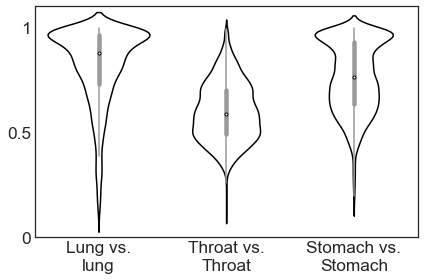

In [16]:
order_fig = ['bal-bal', 'throat_swab-throat_swab', 'gastric_fluid-gastric_fluid']

# Prepare colors
pal = sns.color_palette("Set1")
colors = [pal[1], pal[2], pal[0]]
colordict = {i: k for i, k in zip(order_fig, colors)}

# Prepare boxplot kwargs
boxprops = {'edgecolor': 'k', 'facecolor': 'w'}
lineprops = {'color': 'k'}

fig, ax = plt.subplots()

# sns.boxplot(data=jsdboth, x='site_comparison', y='beta', 
#             fliersize=0, order=order_fig, ax=ax,
#             width=0.7,
#             **{'boxprops': boxprops, 'medianprops': lineprops,
#                    'whiskerprops': lineprops, 'capprops': lineprops})
# sns.stripplot(data=jsdboth, x='site_comparison', y='beta', 
#               order=order_fig, ax=ax,
#               jitter=True, size=6, linewidth=0.25, alpha=0.7)



def patch_violinplot():
    """
    Patch seaborn's violinplot in current axis to workaround matplotlib's bug ##5423.
    Adapted from: https://github.com/mwaskom/seaborn/issues/756
    """
    from matplotlib.collections import PolyCollection, PathCollection
    ax = plt.gca()
    for art in ax.get_children():
        if isinstance(art, PolyCollection) or isinstance(art, PathCollection):
            art.set_edgecolor('k')
            
sns.violinplot(data=jsdboth, x='site_comparison', y='beta', 
               inner='box', order=order_fig, color='white')
patch_violinplot()

ax.set_xlabel('')
ax.set_xticklabels(['Lung vs.\nlung', 
                    'Throat vs.\nThroat',
                    'Stomach vs.\nStomach'],
                  fontsize='xx-large')
ax.set_ylim([0, 1.1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize='xx-large')
ax.set_ylabel('')

fig.tight_layout()
fig.savefig('aspiration.across_patient_beta_div_same_site.png', dpi=200)

# Microbiome pubmed searches

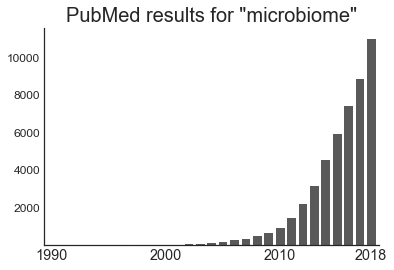

In [5]:
sns.set_style('white')

df = pd.read_csv('timeline.csv', skiprows=1)

df = df.query('year >= 1990').query('year != 2019')
df = df.sort_values(by='year')

fig, ax = plt.subplots()

df.plot(kind='bar', x='year', y='count',
        color='#595959', width=0.85, ax=ax)

yearticks = [1990, 2000, 2010, 2018]
ax.set_xticks([0, 10, 20, 28])
ax.set_xticklabels(yearticks, fontsize='x-large', rotation=0)

# sns.barplot(x='year', y='count', data=df, color='#595959', linewidth=0)
# sns.despine(ax=ax)
# ax.set_xticks([df.query('year == @i')['index'].values[0] for i in yearticks])
# ax.set_xticklabels([subdf.query('year == @i')['year'].values[0] for i in yearticks],
#                   fontsize='x-large')

ax.set_yticks([2000, 4000, 6000, 8000, 10000])
ax.set_yticklabels([2000, 4000, 6000, 8000, 10000], fontsize='large')

ax.set_ylabel('')
ax.set_xlabel('')
ax.legend_.remove()

sns.despine(ax=ax)

ax.set_title('PubMed results for "microbiome"', fontsize=20)

fig.savefig('pubmed_microbiome.png')

# FMT meta-analyses

I'm going to copy the data in both FMT meta-analyses to re-make plots with the same axes.

CDI: Quraishi et al: https://doi.org/10.1111/apt.14201

FMT: Paramsothy et al: https://doi.org/10.1093/ecco-jcc/jjx063

In [6]:
cdi_data = [
    ['Aas 2003', 0.94, 0.7, 1],
    ['Agrawal 2016', 0.83, 0.76, 0.89],
    ['Allegretti 2014', 0.86, 0.65, 0.97],
    ['Brandt 2015', 0.91, 0.82, 0.96],
    ['Costello 2015', 1.0, 0.83, 1.0],
    ['Dutta 2014', 1.0, 0.87, 1.0],
    ['Emmanuelson 2014', 0.7, 0.47, 0.87],
    ['Fischer 2016', 0.81, 0.77, 0.85],
    ['Ganc 2015', 0.83, 0.52, 0.98],
    ['Garborg 2010', 0.82, 0.67, 0.93],
    ['Hamilton 2012',0.95, 0.84, 0.99],
    ['Kassam 2012', 0.93, 0.76, 0.99],
    ['Kelly 2012', 0.92, 0.75, 0.99],
    ['Kelly 2014', 0.85, 0.76, 0.92],
    ['Khan 2014', 1.0, 0.83, 1.0],
    ['Kronman 2015', 1.0, 0.69, 1.0],
    ['Lee 2014', 0.86, 0.78, 0.92],
    ['MacConnachie 2009', 0.8, 0.52, 0.96],
    ['Mattila 2012', 0.94, 0.86, 0.98],
    ['Patel 2013', 0.97, 0.83, 1.0],
    ['Pathak 2014', 1.0, 0.74, 1.0],
    ['Ray 2014', 1.0, 0.83, 1.0],
    ['Rohlke 2010', 1.0, 0.83, 1.0],
    ['Rubin 2013', 0.79, 0.68, 0.87],
    ['Satokari 2015', 0.96, 0.86, 1.0],
    ['Tauxe 2016', 0.87, 0.7, 0.96],
    ['Vigvari 2014', 0.97, 0.83, 1.0],
    ['Yoon 2010', 1., 0.74, 1.0],
    ['Youngster 2014', 0.9, 0.68, 0.99],
    ['Zainah 2015', 0.79, 0.49, 0.95],
    ['Allegretti 2016', 0.95, 0.74, 1.0],
    ['Cammarota 2015', 0.90, 0.68, 0.99],
    ['Kao 2016', 0.95, 0.84, 0.99],
    ['Kelly 2016', 0.95, 0.84, 0.99],
    ['Lee 2016', 0.88, 0.83, 0.92],
    ['Van Nood 2013', 0.94, 0.7, 1.0],
    ['Youngster 2014', 0.9, 0.68, 0.99]
]
df_cdi = pd.DataFrame(cdi_data, columns=['study', 'mean', 'low_ci', 'high_ci'])
df_cdi.head()

,study,mean,low_ci,high_ci
0,Aas 2003,0.94,0.70,1.00
1,Agrawal 2016,0.83,0.76,0.89
2,Allegretti 2014,0.86,0.65,0.97
3,Brandt 2015,0.91,0.82,0.96
4,Costello 2015,1.00,0.83,1.00


In [7]:
ibd_data = [
    ['Angelberger', 0.083, 0.005, 0.622],
    ['Kump 2013', 0.071, 0.004, 0.577],
    ['Kunde', 0.333, 0.111, 0.667],
    ['Cui', 0.267, 0.104, 0.533],
    ['Damman', 0.143, 0.020, 0.581],
    ['Karolewska-Bochenek', 0.1, 0.006, 0.674],
    ['Kellermayer', 0.875, 0.266, 0.993],
    ['Kump 2015', 0.235, 0.091, 0.486],
    ['Scaldaferri', 0.375, 0.125, 0.715],
    ['Suskind', 0.1, 0.006, 0.674],
    ['Vermeire', 0.25, 0.063, 0.623],
    ['Wei 2015', 0.727, 0.414, 0.910],
    ['Ren', 0.714, 0.327, 0.928],
    ['Karaken', 0.429, 0.206, 0.684],
    ['Goyal', 0.038, 0.002, 0.403],
    ['Laszlo', 0.9, 0.326, 0.994],
    ['Wei 2016', 0.35, 0.177, 0.574],
    ['Pai', 0.167, 0.01, 0.806],
    ['Jacob', 0.15, 0.049, 0.376],
    ['Nishida', 0.012, 0.001, 0.164],
    ['Zhang', 0.105, 0.026, 0.337],
    ['Grewal', 0.588, 0.352, 0.79],
    ['Paramsothy', 0.459, 0.308, 0.619]
]
df_ibd = pd.DataFrame(data=ibd_data, columns=['study', 'mean', 'low_ci', 'high_ci'])

In [8]:
df_cdi.shape, df_ibd.shape

((37, 4), (23, 4))

(-0.01, 1.05)

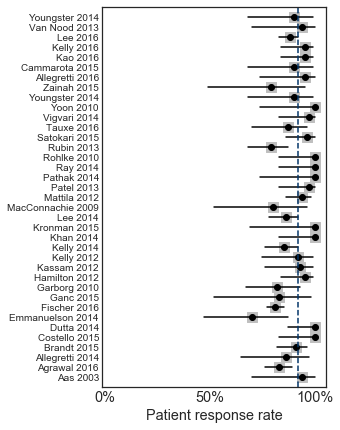

In [9]:
height_mult = 0.3
width = 4

fig, ax = plt.subplots(figsize=(width, 7))

ax.scatter(df_cdi['mean'], df_cdi.index, c='0.75', marker='s', s=100)
ax.scatter(df_cdi['mean'], df_cdi.index, c='k')

for i, row in df_cdi.iterrows():
    ax.plot([row['low_ci'], row['high_ci']], [i, i], c='k')
ax.axvline(0.92, linestyle='--', c='#003366')

ax.set_yticks(df_cdi.index)
ax.set_yticklabels(df_cdi['study'])

ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels(['0%', '50%', '100%'], fontsize='x-large')
ax.set_xlabel('Patient response rate', fontsize='x-large')

ax.set_ylim([-1, df_cdi.shape[0]])
ax.set_xlim([-0.01, 1.05])

#ax.set_title('FMT in CDI', fontsize='xx-large')

(-0.01, 1.05)

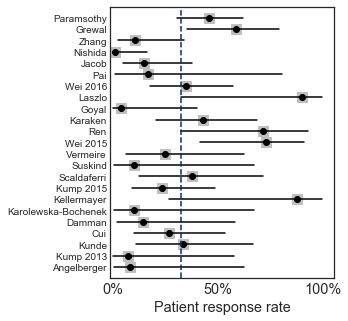

In [10]:
fig, ax = plt.subplots(figsize=(width, 5))

ax.scatter(df_ibd['mean'], df_ibd.index, c='0.75', marker='s', s=100)
ax.scatter(df_ibd['mean'], df_ibd.index, c='k')

for i, row in df_ibd.iterrows():
    ax.plot([row['low_ci'], row['high_ci']], [i, i], c='k')

ax.axvline(0.325, linestyle='--', c='#003366')

ax.set_yticks(df_ibd.index)
ax.set_yticklabels(df_ibd['study'])

ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels(['0%', '50%', '100%'], fontsize='x-large')
ax.set_xlabel('Patient response rate', fontsize='x-large')

ax.set_ylim([-1, df_ibd.shape[0]])
ax.set_xlim([-0.01, 1.05])

#ax.set_title('FMT in IBD', fontsize='xx-large')